<h2> Q2) Train a machine learning model and deploy <h2>

## Importing Libraries

In [ ]:
##Import all the libraries needed to run the project successfully
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Reading Data

In [ ]:
#get train data
train_data_path ='train_data_evaluation_part_2.csv'
train = pd.read_csv(train_data_path, index_col=0)

#get test data
test_data_path ='test_data_evaluation_part2.csv'
test = pd.read_csv(test_data_path, index_col=0)

target_train = train.BookingsCheckedIn.values
target_test = test.BookingsCheckedIn.values

#combine dataset to preprocess
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['ID'], inplace=True, axis=1)

In [ ]:
print("*"*10,"Train Data Set","*"*10)
print("Number of data points:",train.shape[0])
print('Number of features : ', train.shape[1])
print("*"*10,"Test Data Set","*"*10)
print("Number of data points:",test.shape[0])
print('Number of features : ', test.shape[1])

********** Train Data Set **********
Number of data points: 82580
Number of features :  29
********** Test Data Set **********
Number of data points: 1000
Number of features :  29


- We will perform all the analysis on train data only but to preprocess the data we will use combined dataset and then split up as we know test data contains last 1000 rows only.

In [ ]:
# types of columns
numerical_columns = train.select_dtypes(include=np.number)
categorical_columns = train.select_dtypes(include=['object'])
print(f"""Listing the Columns({len(train.columns)} columns):
Numerical columns({len(numerical_columns)}) :  {numerical_columns.columns.tolist()}
Categorical columns({len(categorical_columns)}) :  {categorical_columns.columns.tolist()}
""")

Listing the Columns(29 columns):
Numerical columns(82580) :  ['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
Categorical columns(82580) :  ['Nationality', 'DistributionChannel', 'MarketSegment']



In [ ]:
# Summarize the data
print(f"The dataset has data for {train.shape[0]} transaction and columns {train.shape[1]}")
print("Number of dupicated records in the dataset :",len(train[train.duplicated()]))
pd.options.display.float_format = '{:20.2f}'.format
print("Displaying the first 5 records of data:")
train.head(n=5)

The dataset has data for 82580 transaction and columns 29
Number of dupicated records in the dataset : 0
Displaying the first 5 records of data:


,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.00,150,45,371.00,105.30,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.00,53.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.00,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.00,1095,93,240.00,60.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.00,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Data Preprocessing</h2>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [ ]:
# Converting columns to appropriate datatypes.
train.drop(['ID'], inplace=True, axis=1)

In [ ]:
# Removes blank spaces from string values in dataset
train = train.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
combined = combined.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [ ]:
# summary statistic of all features
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,78834.00,45.47,16.53,-11.00,34.00,46.00,57.00,122.00
DaysSinceCreation,82580.00,459.14,311.31,12.00,183.00,406.00,728.00,1095.00
AverageLeadTime,82580.00,66.56,87.93,-1.00,0.00,30.00,104.00,588.00
LodgingRevenue,82580.00,300.46,373.34,0.00,66.40,234.00,403.80,21781.00
OtherRevenue,82580.00,67.89,114.50,0.00,2.00,39.00,88.00,7730.25
BookingsCanceled,82580.00,0.00,0.07,0.00,0.00,0.00,0.00,9.00
BookingsNoShowed,82580.00,0.00,0.03,0.00,0.00,0.00,0.00,3.00
BookingsCheckedIn,82580.00,0.80,0.70,0.00,1.00,1.00,1.00,66.00
PersonsNights,82580.00,4.67,4.56,0.00,1.00,4.00,7.00,116.00
RoomNights,82580.00,2.37,2.28,0.00,1.00,2.00,4.00,185.00


In [ ]:
## Missing Values Percentage
round((train.isnull().sum() / len(train))*100,2)

Nationality                            0.00
Age                                    4.54
DaysSinceCreation                      0.00
AverageLeadTime                        0.00
LodgingRevenue                         0.00
OtherRevenue                           0.00
BookingsCanceled                       0.00
BookingsNoShowed                       0.00
BookingsCheckedIn                      0.00
PersonsNights                          0.00
RoomNights                             0.00
DaysSinceLastStay                      0.00
DaysSinceFirstStay                     0.00
DistributionChannel                    0.00
MarketSegment                          0.00
SRHighFloor                            0.00
SRLowFloor                             0.00
SRAccessibleRoom                       0.00
SRMediumFloor                          0.00
SRBathtub                              0.00
SRShower                               0.00
SRCrib                                 0.00
SRKingSizeBed                   

## Observations:
- Age count is less than other feature thus it has some missing values.
- Age, AverageLeadTime, DaysSinceLastStay, DaysSinceFirstStay has values which are less than zero which is not possible thus we have to remove it.
- There are outlier present in columns which we have to take care of.
- Most other seem highly unbalanced, most of the observations have value 0
- Deleting Missing Values From The Dataset Is Only An Option if we have less than 5% of missing values on a big dataset.
- Here we can delete rows where age have missing value as it contains less than 5% of data.

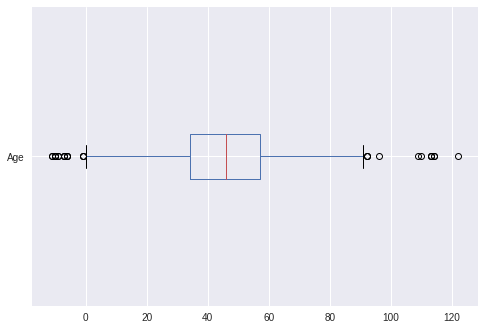

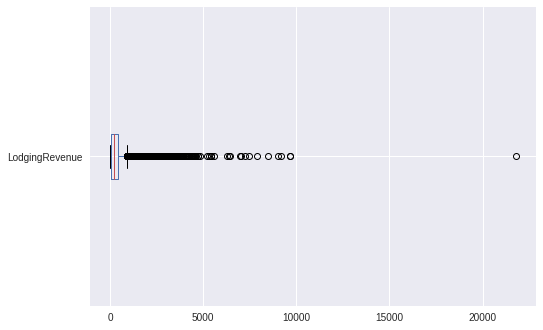

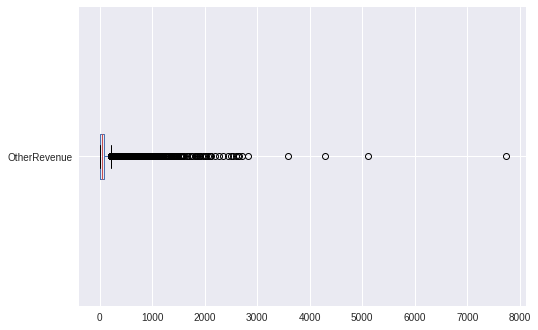

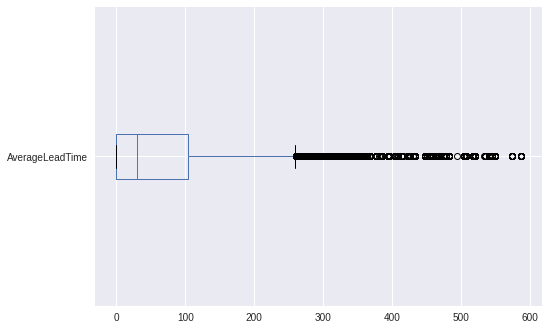

In [ ]:
for i in ['Age', 'LodgingRevenue', 'OtherRevenue','AverageLeadTime']:
    train[[i]].boxplot(vert=False)
    plt.show()

In [ ]:
# Eliminate outliers
train = train[train['LodgingRevenue'] < 10000]
train = train[train['OtherRevenue'] < 3000]
train = train[train['Age'] >0 ]
train = train[train['Age'] < 100 ]
train = train[train['AverageLeadTime'] >= 0] 
train = train[train['AverageLeadTime'] < 550]

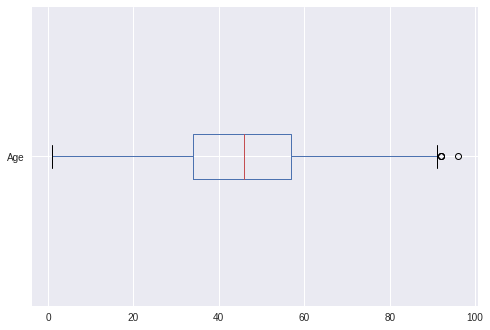

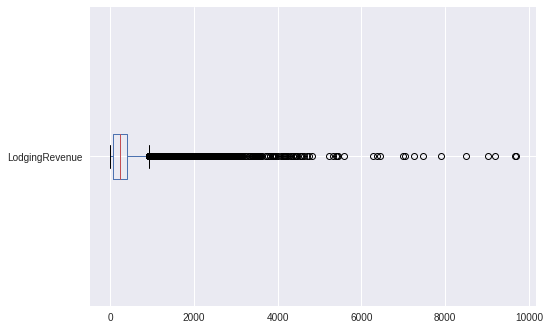

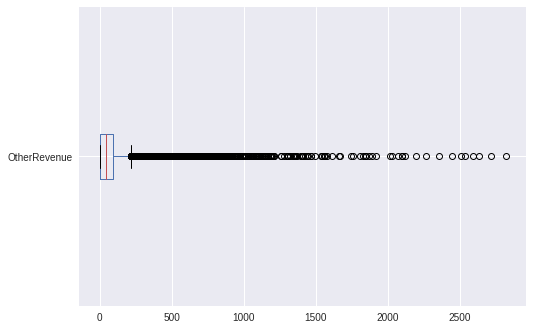

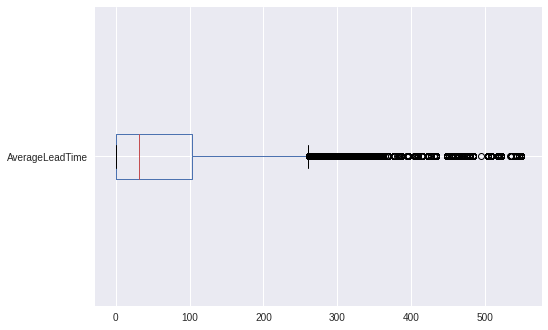

In [ ]:
for i in ['Age', 'LodgingRevenue', 'OtherRevenue','AverageLeadTime']:
    train[[i]].boxplot(vert=False)
    plt.show()

In [ ]:
print('Negative values in age is ', len(train[train['Age'] < 0]))
print('Negative values in averageLeadTime is ', len(train[train['AverageLeadTime'] < 0]))

Negative values in age is  0
Negative values in averageLeadTime is  0


In [ ]:
train.nunique().to_frame(name = 'Number of unique values')

,Number of unique values
Nationality,187
Age,93
DaysSinceCreation,1083
AverageLeadTime,414
LodgingRevenue,9909
OtherRevenue,4369
BookingsCanceled,6
BookingsNoShowed,4
BookingsCheckedIn,28
PersonsNights,54


In [ ]:
cat_summary = train.describe(include=[object]).transpose()
cat_summary['top'] = cat_summary.apply(lambda x: train[x.name][x['top']] if x.name in train and x['top'] in train[x.name]  else x['top'] , axis=1)
cat_summary

,count,unique,top,freq
Nationality,78729,187,FRA,12295
DistributionChannel,78729,4,Travel Agent/Operator,64859
MarketSegment,78729,7,Other,45604


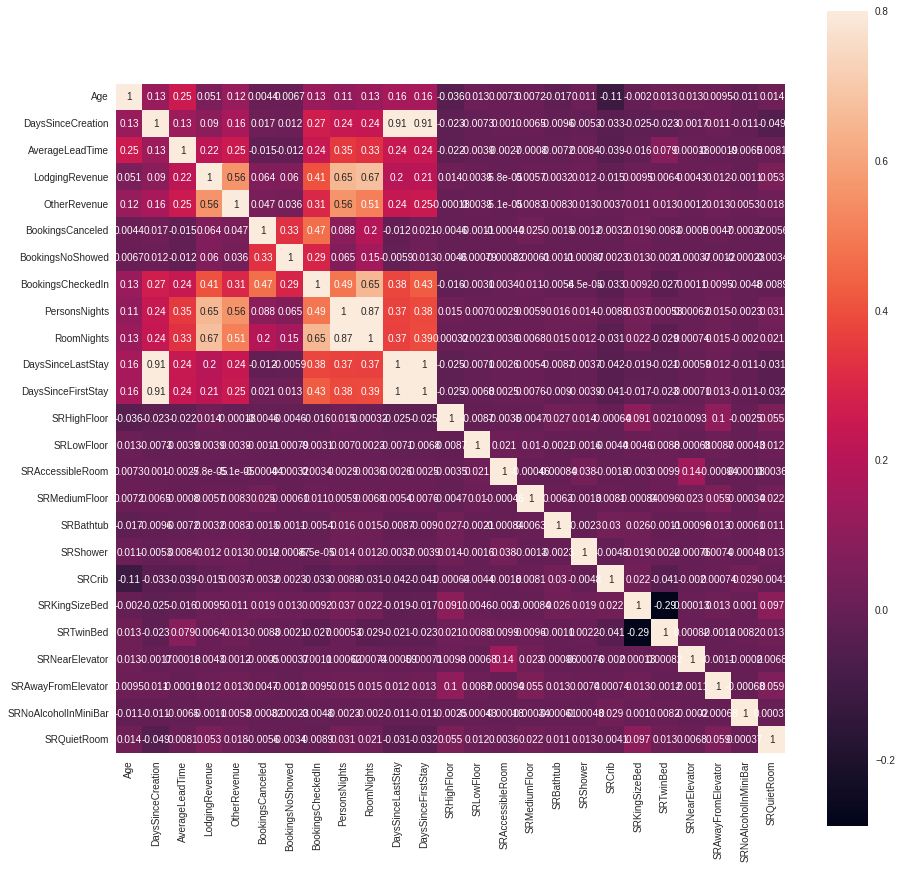

In [ ]:
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True, annot=True)
plt.show()

In [ ]:
correlations=train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs.style.background_gradient(axis=0)

,Attribute Pair,Correlation
1,"('DaysSinceFirstStay', 'DaysSinceLastStay')",0.995319
7,"('DaysSinceCreation', 'DaysSinceFirstStay')",0.910017
4,"('DaysSinceCreation', 'DaysSinceLastStay')",0.905905
8,"('PersonsNights', 'RoomNights')",0.870779
9,"('LodgingRevenue', 'RoomNights')",0.674111
6,"('LodgingRevenue', 'PersonsNights')",0.654984
5,"('BookingsCheckedIn', 'RoomNights')",0.653309
2,"('LodgingRevenue', 'OtherRevenue')",0.559392
0,"('OtherRevenue', 'PersonsNights')",0.557989
3,"('OtherRevenue', 'RoomNights')",0.507344


<Figure size 1800x2880 with 0 Axes>

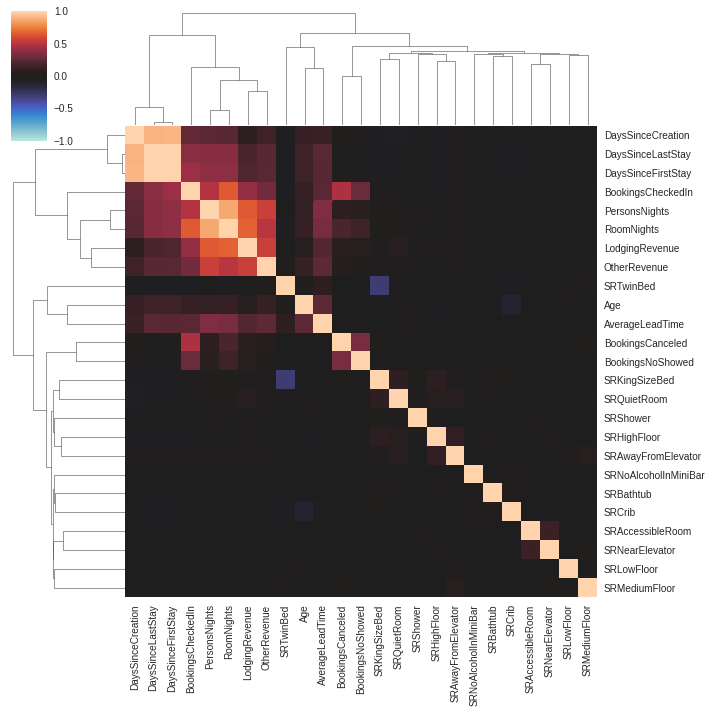

In [ ]:
def corrplot(df, method="pearson", annot=False, **kwargs):
    plt.figure(figsize=(25,40))
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
corrplot(train)

In [ ]:
# Create a function to generate a PMF plot for categorical and discrete variables

def Pmf(series, Title):
    '''Generates a probability mass function (PMF) of a pandas series'''
    value = series.value_counts().sort_index()
    pmf = value*100 / len(series)
    plt.bar(value.index, pmf)
    plt.xticks(value.index, fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('Frequency', fontsize=13)
    plt.title(Title, fontsize=15, fontweight='bold')

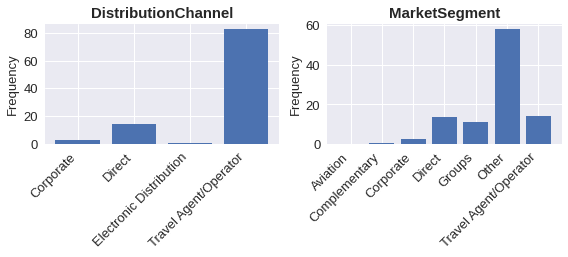

In [ ]:
# Plot DistributionChannel
plt.subplot(2,2,1)
Pmf(train['DistributionChannel'], 'DistributionChannel')
plt.xticks(rotation=45, horizontalalignment='right')

# Plot MarketSegment
plt.subplot(2,2,2)
Pmf(train['MarketSegment'], 'MarketSegment')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

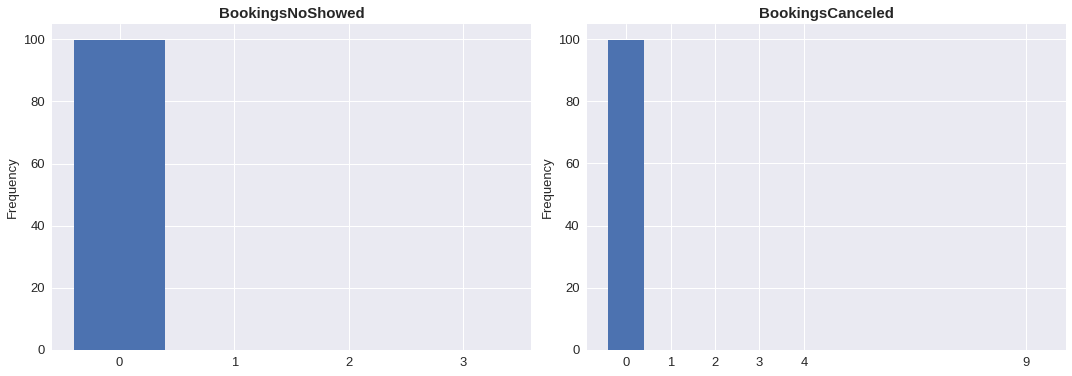

In [ ]:
fig = plt.figure(figsize=(15,10), dpi=72)

# Plot DistributionChannel
plt.subplot(2,2,1)
Pmf(train['BookingsNoShowed'], 'BookingsNoShowed')

# Plot MarketSegment
plt.subplot(2,2,2)
Pmf(train['BookingsCanceled'], 'BookingsCanceled')

plt.tight_layout()
plt.show()

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

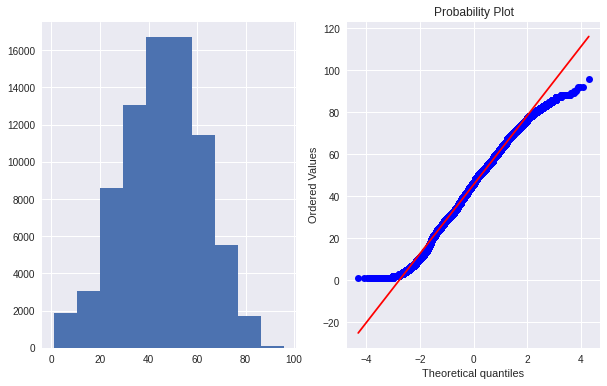

In [ ]:
# Gaussian plot
plot_data(train,'Age')

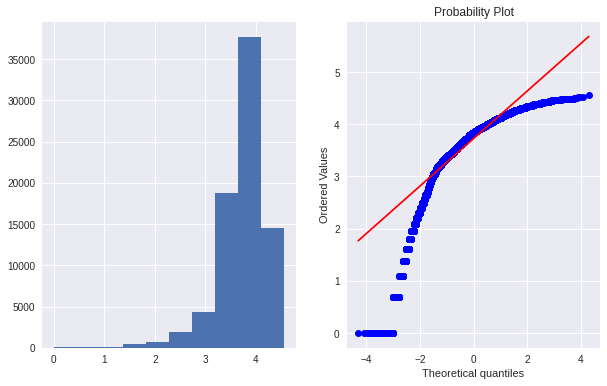

In [ ]:
## Logarithmic Transformation
import numpy as np
train['Age_log']=np.log(train['Age'])
plot_data(train,'Age_log')

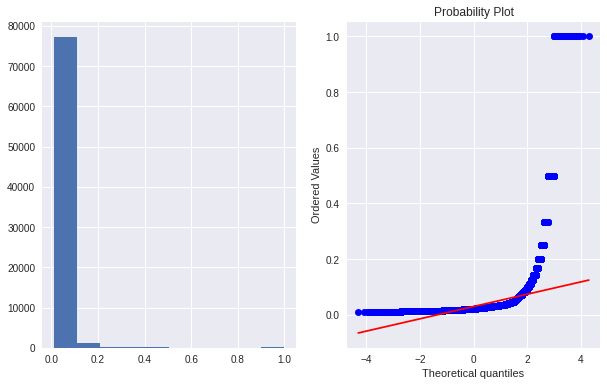

In [ ]:
## Reciprocal Trnasformation
train['Age_reciprocal']=1/train.Age
plot_data(train,'Age_reciprocal')

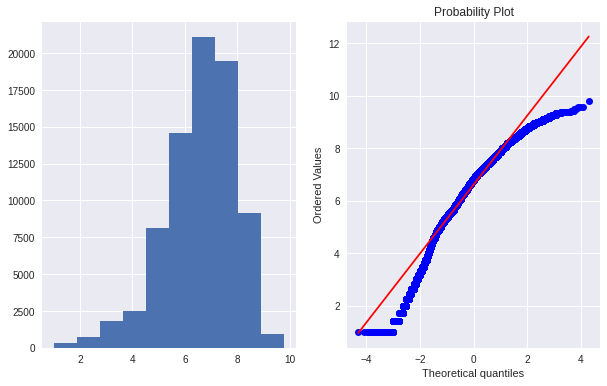

In [ ]:
## Square Root Transformation
train['Age_sqaure']=train.Age**(1/2)
plot_data(train,'Age_sqaure')

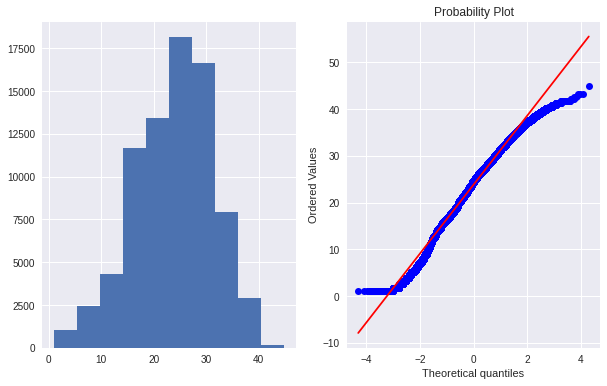

In [ ]:
# Exponential Transdormation
train['Age_exponential']=train.Age**(1/1.2)
plot_data(train,'Age_exponential')

In [ ]:
train.drop(['Age_log','Age_reciprocal','Age_sqaure','Age_exponential'], axis=1,inplace=True)

## Observation :
- Continuous Numerical variables are ('ID' , 'Age' ,'DaysSinceCreation' ,'AverageLeadTime','LodgingRevenue', 'OtherRevenue' ,'BookingsCanceled' ,'BookingsNoShowed','BookingsCheckedIn' ,'PersonsNights' ,'RoomNights' ,'DaysSinceLastStay','DaysSinceFirstStay').
- Categorical Numeric variables are ('SRHighFloor','SRLowFloor', 'SRAccessibleRoom' ,'SRMediumFloor' ,'SRBathtub' ,'SRShower','SRCrib' ,'SRKingSizeBed' ,'SRTwinBed', 'SRNearElevator','SRAwayFromElevator' ,'SRNoAlcoholInMiniBar' ,'SRQuietRoom').
- Categorical variables string are (Nationality, MarketSegment, DistributionChannel) we have convert them into numeric / encode them so that our model can understand it better.
- Nationality have 187 unique categorical values and if we try to encode them the dimensionality of our dataset will increase.So replace Natinality with COunt/Frequency of its occurence by doing encoding which is better than doing OneHotEncoding as it will not increase dimensionality.
- From Heatmap we can see that many features have corrleation with target variable in high value .This shows multicoolinearity.(we took cutogg as 0.7)

In [ ]:
# Nationality column
# top 15 most occuring
# ref - https://www.youtube.com/watch?v=6WDFfaYtN6s
# ref - https://plotly.com/python/pie-charts/
# we will consider top 15 most occuring Nationality and only encode them
import plotly.express as px
top_15 = train['Nationality'].value_counts().head(15)
fig = px.pie( values = top_15.values,names=top_15.keys(), title='Distribution of Nationalities',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

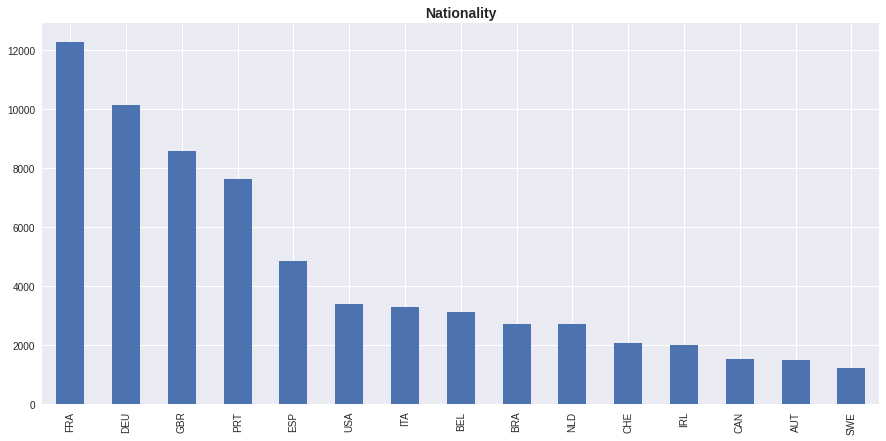

In [ ]:
# Creates figure for plots
fig = plt.figure(figsize=(15,7), dpi=72)

# Plots the first more common country of origin of customers
train['Nationality'].value_counts()[:15].plot(kind='bar')
plt.title('Nationality', fontsize=14, fontweight='bold')
plt.show()

### Observation :
- We can see least value is 1.82% so other Nationality which are not in top 15 most occuring are less than 1.82%.

In [ ]:
combined.drop('index', axis = 1, inplace = True)

In [ ]:
combined

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.00,150,45,371.00,105.30,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,NaN,1095,61,280.00,53.00,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.00,1095,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.00,1095,93,240.00,60.00,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.00,1095,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,ITA,54.00,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83576,IRL,47.00,0,109,327.10,277.50,0,0,1,6,...,0,0,0,0,1,0,0,0,0,0
83577,IRL,53.00,0,0,0.00,0.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83578,IRL,85.00,0,109,981.30,9.00,0,0,1,6,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Shows the number of countries origin of guests

print('There are '+str(combined['Nationality'].nunique())+' different Nationality of origin in the dataset')

There are 188 different Nationality of origin in the dataset


- Nationality has a high cardinality and this could lead to very sparse matrix when we transform the categories into dummy variables. The best option will be regrouping categories even though we lose some information.

In [ ]:
combined = combined.dropna()

## Encoding Features :

### Count/Frequency Encoding of Nationality column :

In [ ]:
# let's obtain the counts for each one of the labels in variable Natinality
# let's capture this in a dictionary that we can use to re-map the labels

combined.Nationality.value_counts().to_dict()

{'FRA': 12418,
 'DEU': 10232,
 'GBR': 8656,
 'PRT': 7816,
 'ESP': 4901,
 'USA': 3429,
 'ITA': 3365,
 'BEL': 3119,
 'BRA': 2902,
 'NLD': 2725,
 'CHE': 2107,
 'IRL': 1996,
 'CAN': 1524,
 'AUT': 1489,
 'SWE': 1231,
 'ISR': 900,
 'CHN': 891,
 'NOR': 795,
 'POL': 760,
 'AUS': 723,
 'DNK': 666,
 'FIN': 651,
 'RUS': 579,
 'ROU': 478,
 'HUN': 329,
 'JPN': 272,
 'CZE': 251,
 'GRC': 238,
 'LUX': 228,
 'IND': 203,
 'KOR': 195,
 'AGO': 182,
 'ARG': 179,
 'MEX': 177,
 'MAR': 168,
 'TUR': 163,
 'BGR': 162,
 'SRB': 147,
 'HRV': 137,
 'EST': 126,
 'NZL': 97,
 'UKR': 96,
 'LVA': 91,
 'DZA': 78,
 'MOZ': 77,
 'CHL': 77,
 'IRN': 76,
 'SVK': 75,
 'TWN': 70,
 'COL': 69,
 'LTU': 66,
 'ZAF': 64,
 'SVN': 60,
 'CYP': 57,
 'ISL': 54,
 'PHL': 54,
 'AZE': 52,
 'SGP': 40,
 'PER': 39,
 'THA': 39,
 'LBN': 37,
 'MLT': 35,
 'URY': 34,
 'SAU': 33,
 'TUN': 33,
 'ARE': 31,
 'BLR': 30,
 'VNM': 29,
 'VEN': 28,
 'CMR': 25,
 'EGY': 24,
 'BIH': 23,
 'ECU': 21,
 'IDN': 21,
 'MYS': 20,
 'MKD': 18,
 'JOR': 17,
 'KAZ': 17,
 'CRI':

In [ ]:
# And now let's replace each label in Natinality by its count
# first we make a dictionary that maps each label to the counts

combined_frequency_map = combined.Nationality.value_counts().to_dict()

# and now we replace X2 labels in the dataset df
combined.Nationality = combined.Nationality.map(combined_frequency_map)

combined.head(3)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,7816,51.00,150,45,371.00,105.30,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,10232,31.00,1095,0,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12418,60.00,1095,93,240.00,60.00,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0


- Advantage of using this encoding is it does not increase the feature dimensional space
- Disadvantage is if some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.

In [ ]:
# Select categorical columns with relatively low cardinality 
categorical_cols = [cname for cname in combined.columns if
                    combined[cname].nunique() < 100 and 
                    combined[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in combined.columns if 
                combined[cname].dtype in ['int64', 'float64']]

# Keep selected columns only - numerical and low cardinality categorical columns
my_cols = categorical_cols + numerical_cols
combined = combined[my_cols]

# One Hot Encoding remaining features

In [ ]:
#one hot encoding
combined = pd.get_dummies(combined, drop_first=True)

In [ ]:
# Writing df dataframe to csv

path = 'part_2_combinedclean.csv'
combined.to_csv(path)

## Standardization

In [ ]:
# standarisation: We use the MinMaxScaler() from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# apply scaler() to all the numeric columns 
numeric_vars = ['Nationality','BookingsCheckedIn','Age' ,'DaysSinceCreation','AverageLeadTime','BookingsCanceled' ,'BookingsNoShowed' ,'PersonsNights' ,'RoomNights', 'DaysSinceLastStay','DaysSinceFirstStay' ,'OtherRevenue', 'LodgingRevenue']
combined[numeric_vars] = scaler.fit_transform(combined[numeric_vars])

### split back combined dataFrame to training data and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined.drop(['BookingsCheckedIn'],axis=1), combined.BookingsCheckedIn, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

0.6674920487373726

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
regressor.score(X_test,y_test)

0.5598644657762311

## XGBoost Regression

In [ ]:
## define a gradient boosting model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

[16:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6988004030764804

In [ ]:
ypred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, ypred)
print("XGB MSE =", xgb_mse)

XGB MSE = 6.884075314067245e-05


In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=3)
ridge_model.fit(X_train, y_train);

ypred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ypred)
print("Ridge MSE =", ridge_mse)
print("Ridge score = " ,ridge_model.score(X_test,y_test))

Ridge MSE = 8.632324946434486e-05
Ridge score =  0.6223090719147364


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
en_model = ElasticNet(alpha=0)
en_model.fit(X_train, y_train);

ypred = en_model.predict(X_test)
en_mse = mean_squared_error(y_test, ypred)
print("ElasticNet MSE =", en_mse)
print("ElasticNet = " ,en_model.score(X_test,y_test))

ElasticNet MSE = 7.599951554017609e-05
ElasticNet =  0.6674786023867694


In [ ]:
en_model = ElasticNet(alpha=0)
en_model.fit(X_train, y_train);

ypred = en_model.predict(X_test)
en_mse = mean_squared_error(y_test, ypred)
print("ElasticNet MSE =", en_mse)
print("ElasticNet = " ,en_model.score(X_test,y_test))